In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Load the dataset
data = pd.read_csv("filtered_european_countries_dataset.csv")

# Step 2: One-hot encode categorical columns
attribute_level_encoding = pd.get_dummies(data['AttributeLevel'])
scenario_type_strict_encoding = pd.get_dummies(data['ScenarioTypeStrict'])
scenario_type_encoding = pd.get_dummies(data['ScenarioType'])
default_choice_encoding = pd.get_dummies(data['DefaultChoice'])
non_default_choice_encoding = pd.get_dummies(data['NonDefaultChoice'])

# Concatenate the one-hot encoded columns with the original DataFrame
data_encoded = pd.concat([data, attribute_level_encoding, scenario_type_strict_encoding,
                          scenario_type_encoding, default_choice_encoding, non_default_choice_encoding], axis=1)

# Step 3: Drop original categorical columns and additional columns
columns_to_drop = ['AttributeLevel', 'ScenarioTypeStrict', 'ScenarioType', 'DefaultChoice', 'NonDefaultChoice',
                   'ResponseID', 'ExtendedSessionID', 'UserID', 'Template']
data_encoded.drop(columns=columns_to_drop, inplace=True)

# Step 4: Data Preprocessing
# Drop rows with missing values
data_encoded = data_encoded.dropna()

# Split the data into features (X) and target (y)
X = data_encoded.drop('UserCountry3', axis=1)
y = data_encoded['UserCountry3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Drop non-numeric columns from the training data
X_train_numeric = X_train.select_dtypes(exclude=['object'])

# Step 6: Random Forest Model Training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_numeric, y_train)

# Step 7: Feature Importance Analysis
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index=X_train_numeric.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importance:")
print(feature_importances)

# Step 8: Evaluation
# Drop non-numeric columns from the test data
X_test_numeric = X_test.select_dtypes(exclude=['object'])
# Predict on the test set
y_pred = rf_model.predict(X_test_numeric)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Feature Importance:
                         importance
ScenarioOrder              0.296742
NumberOfCharacters         0.068370
CrossingSignal             0.059238
LeftHand                   0.046186
Woman                      0.039515
Man                        0.038967
PedPed                     0.033478
Saved                      0.028034
MaleAthlete                0.023863
FemaleAthlete              0.023861
LargeMan                   0.023687
LargeWoman                 0.023050
OldMan                     0.022807
Boy                        0.022051
OldWoman                   0.021711
Girl                       0.020883
MaleExecutive              0.018191
Barrier                    0.018172
FemaleExecutive            0.017235
MaleDoctor                 0.017178
FemaleDoctor               0.015438
DiffNumberOFCharacters     0.013986
Intervention               0.012537
DefaultChoiceIsOmission    0.012528
Homeless                   0.012524
Criminal                   0.010677
Dog     

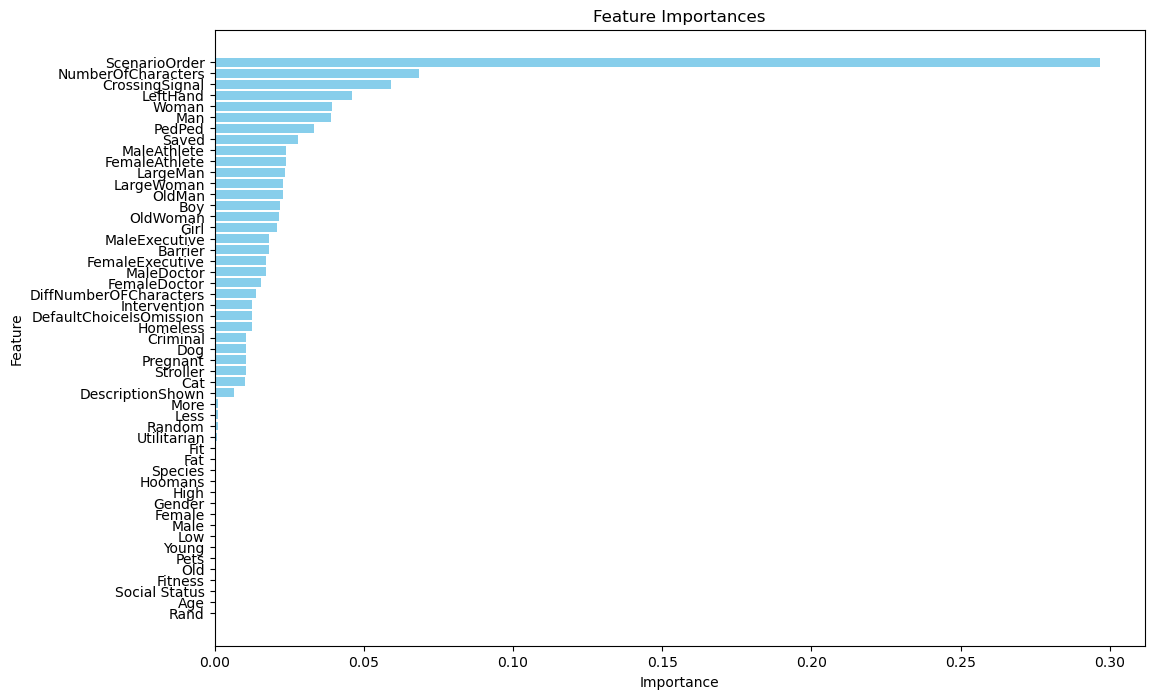

In [4]:

import matplotlib.pyplot as plt
import os

# Plotting feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances.index, feature_importances['importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top

# Define the path to save the image
desktop_path = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop')
image_path = os.path.join(desktop_path, 'feature_importance_plot.png')

# Save the plot as an image
plt.savefig(image_path, bbox_inches='tight')

# Show the plot
plt.show()

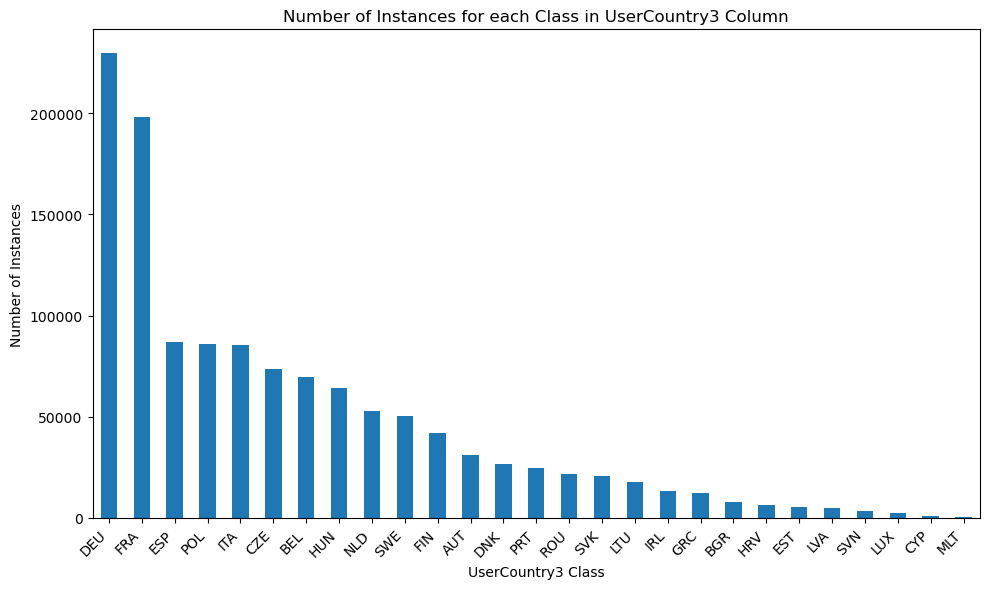

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("filtered_european_countries_dataset.csv")

# Extract the "UserCountry3" column
user_country_counts = df['UserCountry3'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
user_country_counts.plot(kind='bar')
plt.title('Number of Instances for each Class in UserCountry3 Column')
plt.xlabel('UserCountry3 Class')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot to desktop
desktop_path = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop')
plt.savefig(os.path.join(desktop_path, 'user_country_plot.png'))

plt.show()



In [2]:
import pandas as pd

df = pd.read_csv("filtered_european_countries_dataset.csv")
user_country_counts = df['UserCountry3'].value_counts()
print(user_country_counts)

DEU    230022
FRA    197963
ESP     87022
POL     85672
ITA     85263
CZE     73701
BEL     69772
HUN     64034
NLD     52742
SWE     50512
FIN     42010
AUT     31187
DNK     26478
PRT     24530
ROU     21438
SVK     20475
LTU     17505
IRL     13437
GRC     12148
BGR      7868
HRV      6468
EST      5407
LVA      4697
SVN      3399
LUX      2549
CYP       843
MLT       473
Name: UserCountry3, dtype: int64
